Import

In [1]:
# Matplotlib
import matplotlib.pyplot as plt
# Tensorflow
import tensorflow as tf

# from tensorflow import keras as keras

# import pytorch as torch
# Numpy and Pandas
import numpy as np
import pandas as pd
# Ohter import
import sys

In [2]:
assert hasattr(tf, "function")  # Be sure to use tensorflow 2.0

Fashion MNIST dataset

In [78]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

fashion_mnist = tf.keras.datasets.fashion_mnist
(images, labels), (_, _) = fashion_mnist.load_data()

# Get only a subpart of the dataset
images = images[:10000]
labels = labels[:10000]

# Split the dataset into train and test
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=0)

print('dimensions of train_images: ', train_images.shape)
print('dimensions of train_labels: ', train_labels.shape)
# print('train_images: ', train_images[0])


# Reshape the images and convert to float
train_images = train_images.reshape(train_images.shape[0], -1)
train_images = train_images.astype(float)
# train_images = train_images / 255

test_images = test_images.reshape(test_images.shape[0], -1)
test_images = test_images.astype(float)

# Scale the values
scaler = StandardScaler()
train_images = scaler.fit_transform(train_images)
test_images = scaler.transform(test_images)

print('dimensions of train_images: ', train_images.shape)
print('dimensions of train_labels: ', train_labels.shape)

print('first image: ', train_images[0])




dimensions of train_images:  (8000, 28, 28)
dimensions of train_labels:  (8000,)
dimensions of train_images:  (8000, 784)
dimensions of train_labels:  (8000,)
first image:  [-1.53411047e-02 -2.82426521e-02 -2.90640007e-02 -4.83522759e-02
 -6.46551343e-02 -7.76482937e-02 -1.06050231e-01 -1.69277381e-01
 -2.42596954e-01 -3.68642592e-01 -2.74521076e-01 -2.90396818e-02
 -1.09154975e-01 -2.31196827e-01 -3.62245110e-01 -7.67427474e-02
  4.97868014e-02 -6.46667702e-01 -5.04928632e-01 -3.22757695e-01
 -2.12032965e-01 -1.44959541e-01 -1.14185918e-01 -9.35749779e-02
 -6.61687628e-02 -5.14217481e-02 -3.74608941e-02 -1.76498805e-02
 -1.78380784e-02 -2.01221581e-02 -3.27578111e-02 -5.89670366e-02
 -8.56706082e-02 -1.32423361e-01 -2.50264112e-01 -3.59836047e-01
 -4.70830638e-01 -3.22913398e-01 -7.24998843e-01 -1.00152343e+00
 -1.08796561e+00 -7.38066769e-01 -8.24968329e-01 -1.10503832e+00
 -1.09419588e+00 -8.61293554e-01 -7.68694820e-01 -5.98036159e-01
 -4.43412405e-01 -3.13650426e-01 -2.03905745e-0

Plot one of the data

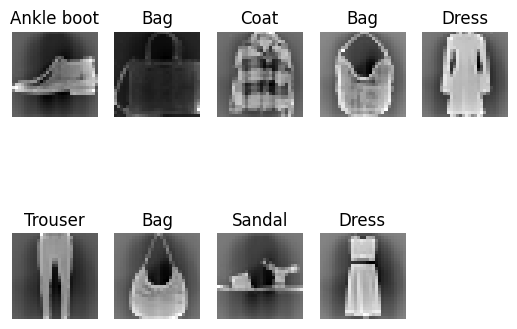

In [79]:
targets_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", 
                 "Shirt", "Sneaker", "Bag", "Ankle boot"]

for i in range (1,10):
    plt.subplot(2,5,i)
    plt.imshow(train_images[i].reshape(28,28), cmap='gray')
    plt.title(targets_names[train_labels[i]])
    plt.axis('off')

Create the model

784 inputs (pixels of images)
9 outputs (categories labels)

hidden layers proposition (256, 128)

In [101]:

model = tf.keras.models.Sequential()

# Add the layers
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
# softmax is used for multiclass classification


model_output = model.predict(train_images[0:1])
print('model_output: ', model_output)

1/1 [==============================] - 0s 371ms/step
model_output:  [[0.00621259 0.01015743 0.03579671 0.06148041 0.34891742 0.03838326
  0.07411788 0.03544423 0.03266991 0.35682017]]


Model summary

In [85]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 256)               200960    
                                                                 
 dense_40 (Dense)            (None, 128)               32896     
                                                                 
 dense_41 (Dense)            (None, 10)                1290      
                                                                 
Total params: 235146 (918.54 KB)
Trainable params: 235146 (918.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Compile the model

In [102]:
print('dimensions of train_images: ', train_images.shape)
print('dimensions of train_labels: ', train_labels.shape)

model.compile(
    optimizer='sgd',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

dimensions of train_images:  (8000, 784)
dimensions of train_labels:  (8000,)


Train the model

In [103]:
history = model.fit(train_images, train_labels, epochs=50, validation_split=0.2, verbose=1, batch_size=8)

Epoch 1/50
800/800 [==============================] - 6s 6ms/step - loss: 0.6799 - accuracy: 0.7588 - val_loss: 0.5557 - val_accuracy: 0.7887
Epoch 2/50
800/800 [==============================] - 8s 10ms/step - loss: 0.4127 - accuracy: 0.8487 - val_loss: 0.5047 - val_accuracy: 0.8163
Epoch 3/50
800/800 [==============================] - 6s 8ms/step - loss: 0.3404 - accuracy: 0.8814 - val_loss: 0.4983 - val_accuracy: 0.8175
Epoch 4/50
800/800 [==============================] - 6s 8ms/step - loss: 0.2892 - accuracy: 0.8961 - val_loss: 0.4931 - val_accuracy: 0.8269
Epoch 5/50
800/800 [==============================] - 6s 7ms/step - loss: 0.2480 - accuracy: 0.9123 - val_loss: 0.4609 - val_accuracy: 0.8388
Epoch 6/50
800/800 [==============================] - 6s 7ms/step - loss: 0.2164 - accuracy: 0.9277 - val_loss: 0.4580 - val_accuracy: 0.8388
Epoch 7/50
800/800 [==============================] - 7s 8ms/step - loss: 0.1896 - accuracy: 0.9331 - val_loss: 0.4781 - val_accuracy: 0.8406
Epoch

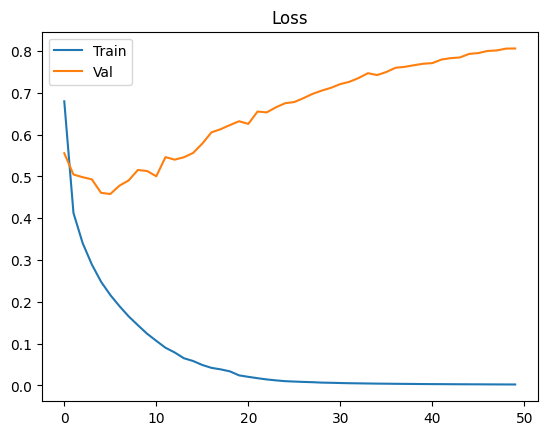

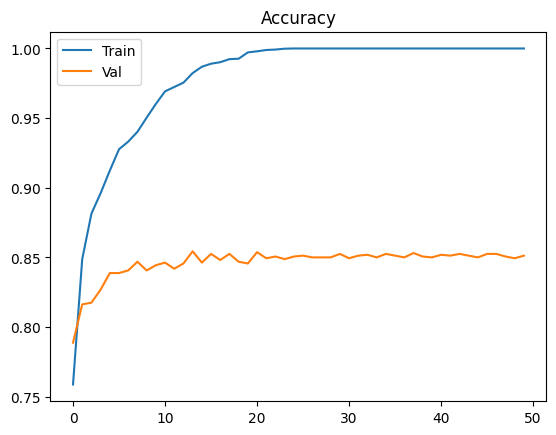

In [104]:
loss_curve = history.history["loss"]
acc_curve = history.history["accuracy"]

loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_accuracy"]

plt.plot(loss_curve, label="Train")
plt.plot(loss_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Loss")
plt.show()

plt.plot(acc_curve, label="Train")
plt.plot(acc_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Accuracy")
plt.show()

Test of the result

In [94]:
loss, acc = model.evaluate(test_images, test_labels)
print("Test Loss", loss)
print("Test Accuracy", acc)



63/63 [==============================] - 0s 4ms/step - loss: 0.4985 - accuracy: 0.8565
Test Loss 0.49849632382392883
Test Accuracy 0.8565000295639038


In [77]:
model_output = model.predict(test_images[0:25])

print('test_labels: ', test_labels[0:25])
# print('model_output: ', model_output)

# rounded_outputs = np.round(model_output, 2)
# print('rounded_outputs: ', rounded_outputs)

filtered_outputs = [np.argmax(model_output, axis=1)]
max_values = [(np.argmax(row), np.round(max(row), 2)) for row in model_output]
print('filtered_outputs: ', max_values)

1/1 [==============================] - 0s 103ms/step
test_labels:  [0 8 7 1 5 5 4 7 9 8 5 1 5 5 8 2 4 7 3 9 7 2 8 8 0]
filtered_outputs:  [(0, 0.79), (8, 0.87), (7, 0.88), (1, 1.0), (5, 1.0), (5, 0.99), (4, 0.95), (7, 1.0), (9, 1.0), (8, 0.98), (5, 1.0), (1, 1.0), (5, 0.94), (5, 0.99), (8, 0.99), (4, 0.63), (4, 1.0), (7, 0.99), (3, 0.97), (9, 1.0), (7, 0.99), (2, 0.81), (8, 1.0), (8, 1.0), (0, 0.93)]


Save and Charge model

In [ ]:
model.save('fashion_mnist_2.h5')

In [ ]:
loaded_model = tf.keras.models.load_model('fashion_mnist.h5')